In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time 
import sys
import csv
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn import model_selection
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import preprocessing
import pickle

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANDRA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
pickle_in = open('df_tot.pickle','rb')
df_tot = pickle.load(pickle_in)
pickle_in.close()
pickle_in = open('body_and_title.pickle','rb')
body_and_title = pickle.load(pickle_in)
pickle_in.close()

In [2]:
list_stop_words = set(nltk.corpus.stopwords.words('english'))    

In [3]:
def tokenizer_fct(string):
    tokenizer1 = nltk.RegexpTokenizer(r'[a-zA-Z]{2,}')
    lemmatizer = nltk.stem.WordNetLemmatizer() 
    text = tokenizer1.tokenize(string)
    text2 = [lemmatizer.lemmatize(item) for item in text]
    return text2

In [17]:
t0 = time()
vectorizer = CountVectorizer(
    tokenizer=tokenizer_fct,stop_words=list_stop_words,max_df=0.90 ,min_df=0.05)
tf = vectorizer.fit_transform(body_and_title)
t1 = time()
print(t1-t0)
lda = LatentDirichletAllocation(n_components = 20, random_state=0,n_jobs=-1,max_iter=20)
lda.fit(tf)
t2 = time()
print(t2-t1,t2-t0)

C:\Users\SANDRA\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  warnings.warn(


332.0503308773041
1554.5801665782928 1886.630497455597


In [19]:
tf_feature_names = vectorizer.get_feature_names_out()
print(tf_feature_names)

['able' 'access' 'add' 'added' 'already' 'also' 'android' 'another'
 'anyone' 'api' 'app' 'application' 'array' 'based' 'body' 'build'
 'button' 'call' 'called' 'cannot' 'case' 'change' 'check' 'class'
 'client' 'code' 'color' 'column' 'com' 'command' 'component' 'config'
 'console' 'const' 'container' 'content' 'context' 'core' 'correct'
 'could' 'create' 'created' 'current' 'currently' 'data' 'def' 'default'
 'different' 'display' 'div' 'doe' 'done' 'edit' 'element' 'else' 'end'
 'error' 'even' 'event' 'every' 'example' 'exception' 'expected' 'export'
 'failed' 'false' 'field' 'file' 'find' 'fine' 'first' 'fix' 'following'
 'found' 'function' 'get' 'getting' 'give' 'go' 'google' 'got' 'ha' 'help'
 'however' 'html' 'http' 'id' 'idea' 'image' 'import' 'include' 'index'
 'input' 'inside' 'instance' 'instead' 'int' 'io' 'issue' 'item' 'j'
 'java' 'json' 'key' 'know' 'last' 'length' 'let' 'library' 'like' 'line'
 'link' 'list' 'load' 'local' 'log' 'look' 'main' 'make' 'map' 'message'
 'me

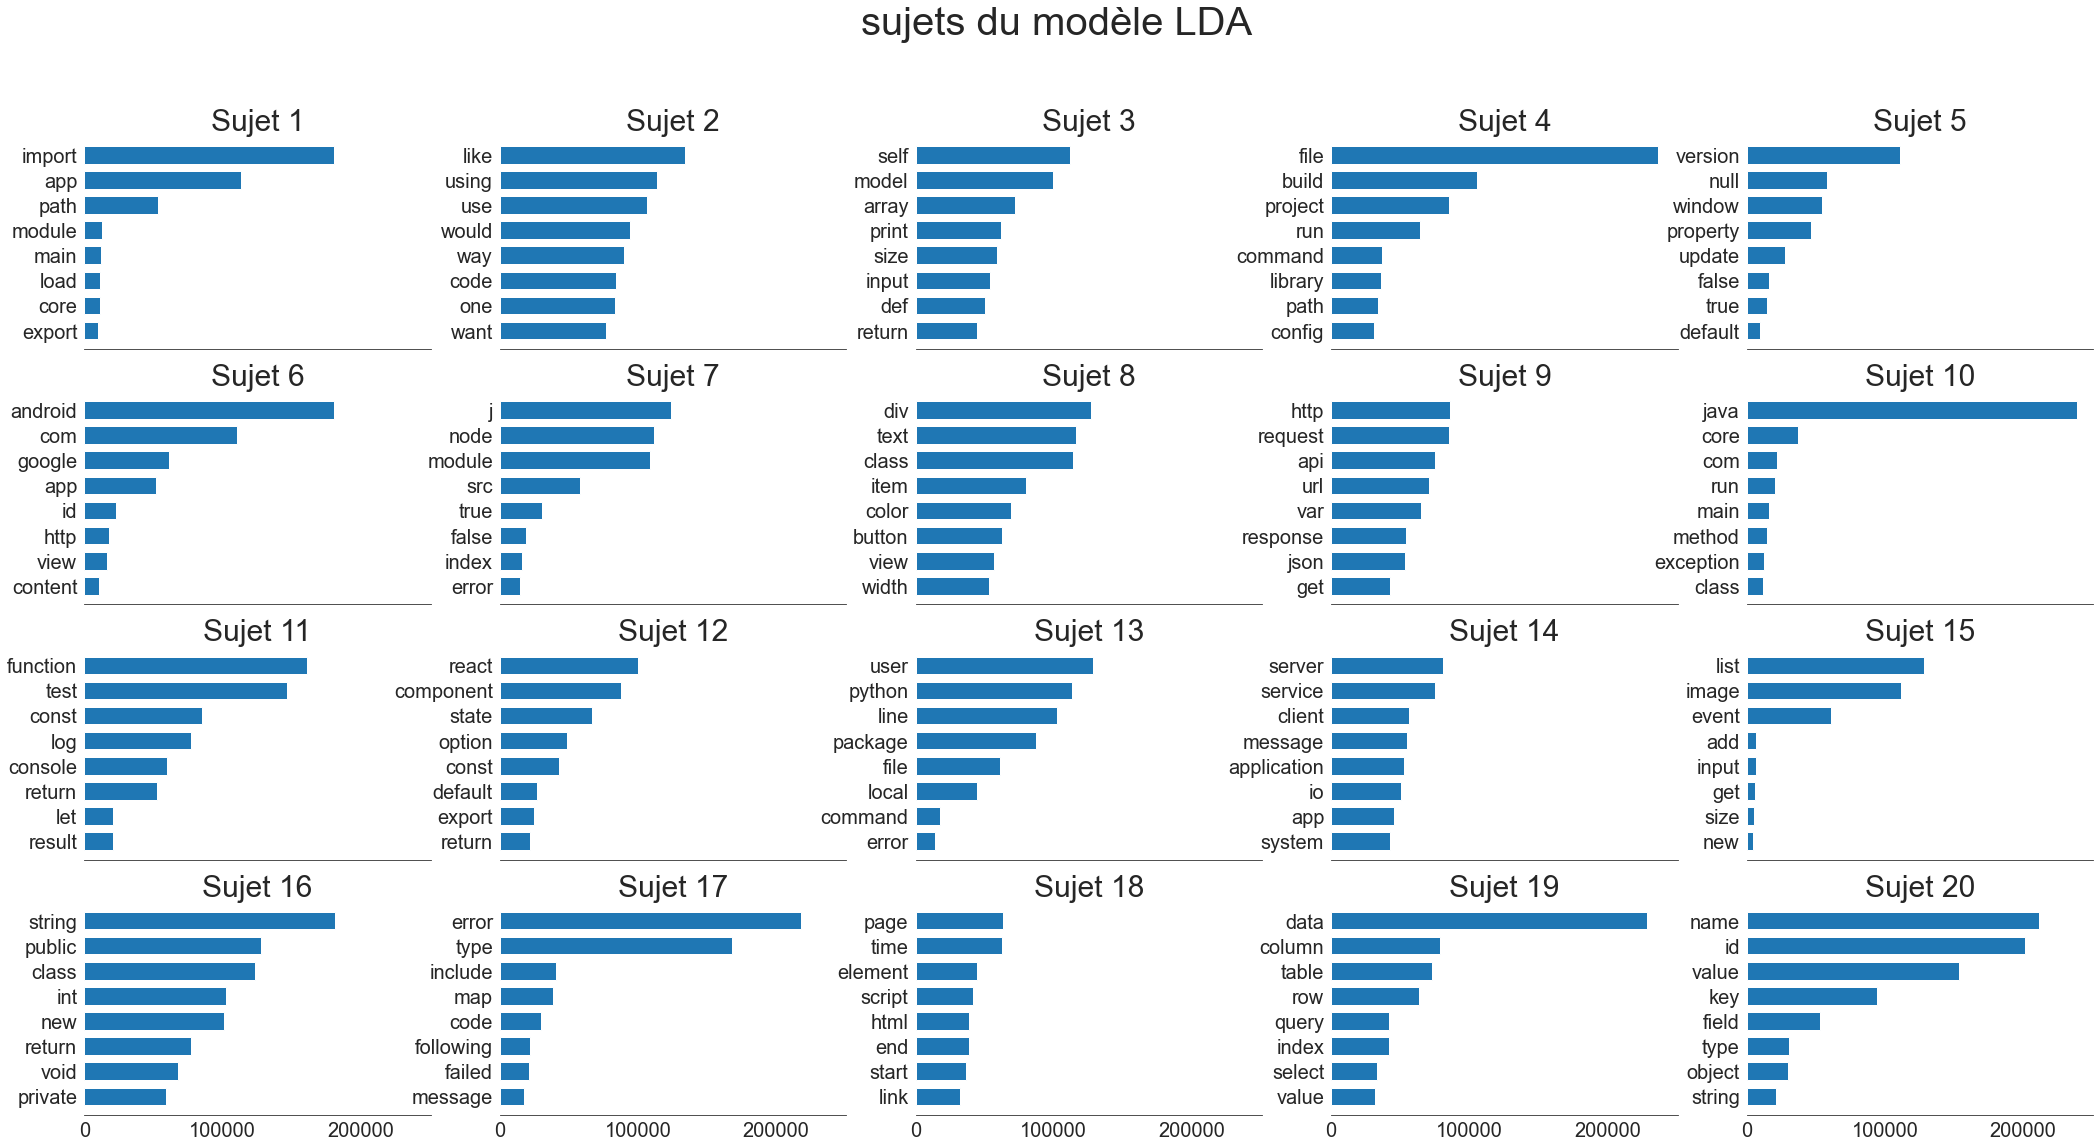

In [36]:
sns.set_style("white")
n_top_words = 8
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(4, 5, figsize=(36, 18), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Sujet {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
plot_top_words(lda, tf_feature_names, n_top_words, "sujets du modèle LDA")

In [23]:
topic_distrib = lda.transform(tf)

In [32]:
topic_distrib[0:1,]

array([[0.00073529, 0.00073529, 0.00073529, 0.07823842, 0.00073529,
        0.56217743, 0.00073529, 0.00073529, 0.00073529, 0.00073529,
        0.00073529, 0.00073529, 0.34708415, 0.00073529, 0.00073529,
        0.00073529, 0.00073529, 0.00073529, 0.00073529, 0.00073529]])